In [1]:
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import numpy as np

In [2]:
data = pd.read_csv("BBC News.csv")

In [3]:
data.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


### Understanding Features and Target Variables

In [4]:
category_list = data['Category'].unique()
category_list

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [5]:
data.shape

(1490, 3)

In [6]:
data.dtypes

ArticleId     int64
Text         object
Category     object
dtype: object

### Checking for NULL values

In [7]:
data.isnull().any()

ArticleId    False
Text         False
Category     False
dtype: bool

### Countplot of target Variable(Category)

c:\Users\racha\dev\project_experiment\first_classification\exenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

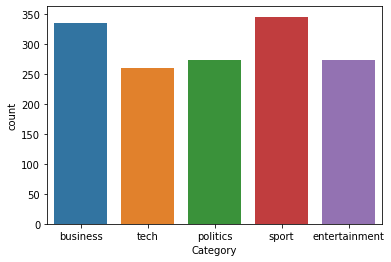

In [8]:
sns.countplot(data.Category)

In [9]:
data['News_length'] = data['Text'].str.len()
data['News_length']

0       1866
1       2016
2       3104
3       3618
4       2190
        ... 
1485    1266
1486    3111
1487    1370
1488    3242
1489    1723
Name: News_length, Length: 1490, dtype: int64

In [12]:
def count_words(category=''):
    word_list = set()
    if(category != ''):
        sub_frame = data[data['Category']==category]
    else:
        sub_frame = data

    for text in sub_frame['Text']:
        
        text = text.lower().replace('\n', ' ').replace('\r', '').strip()
        text = re.sub(' +', ' ', text)
        text = re.sub(r'[^\w\s]', '', text)

        stop_words = set(stopwords.words('english'))
        word_tokens = word_tokenize(text)
        filtered_sentence = [w for w in word_tokens if not w in stop_words]


        word_list.update(filtered_sentence)

    return len(word_list)

In [14]:
print('Total Word:')
print(count_words())

Total Word:
27132


<AxesSubplot:xlabel='category', ylabel='words_count'>

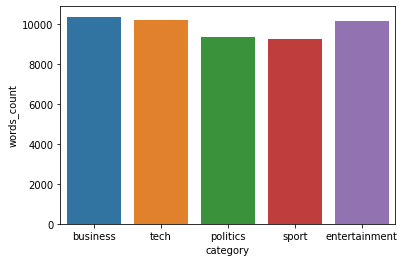

In [17]:
words_count = {'category': category_list, 'words_count': [count_words(category) for category in category_list]}
w_count_data = pd.DataFrame(words_count)
sns.barplot(x= 'category', y='words_count', data=w_count_data)

### Distribution Plot

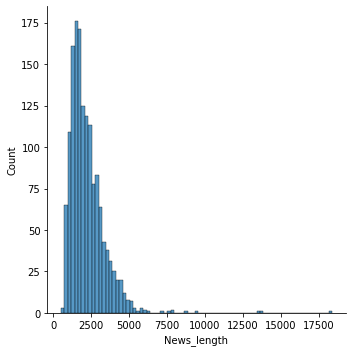

In [10]:
sns.displot(data['News_length']).set_titles('News length')

### WordCloud

In [11]:
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=[10, 7])
    plt.imshow(wordcloud, interpolation= "bilinear")
    plt.axis('off')
    plt.show()

In [12]:
def check_wordcloud(category):
    subset = data[data.Category==category]
    text = subset.Text.values
    words = ''.join(text)
    create_wordcloud(words)

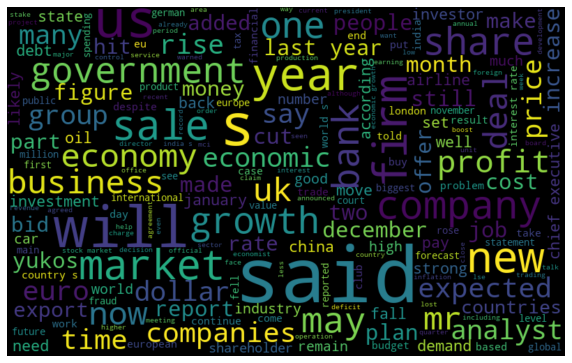

In [13]:
check_wordcloud("business")

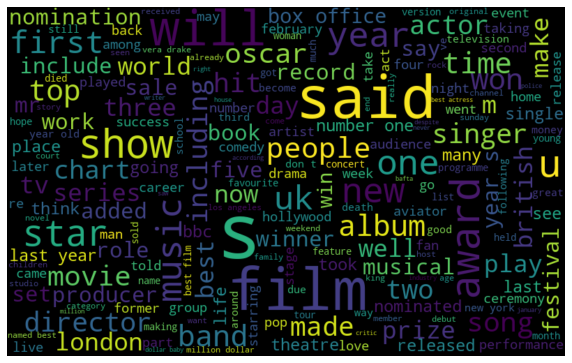

In [14]:
check_wordcloud("entertainment")

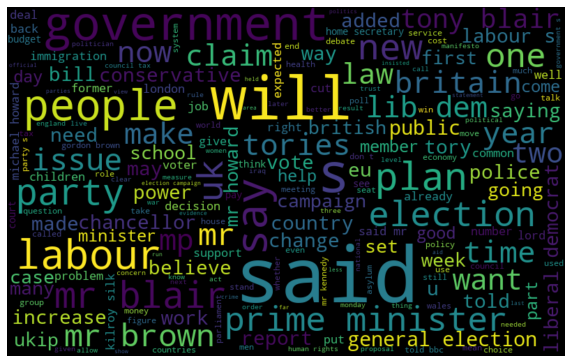

In [15]:
check_wordcloud("politics")

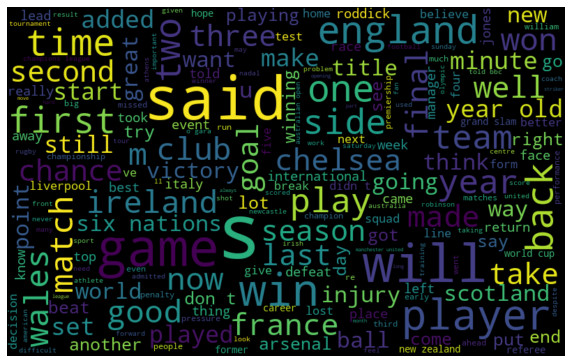

In [16]:
check_wordcloud('sport')

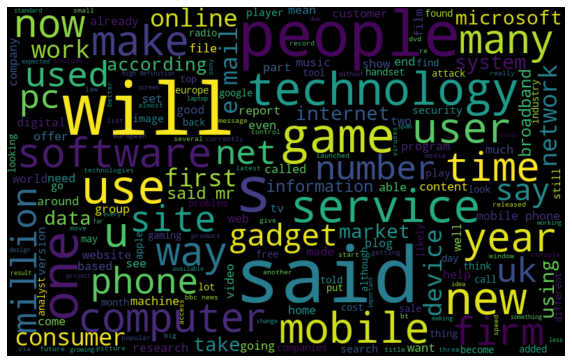

In [17]:
check_wordcloud("tech")

### Thai WordCloud Showcase

In [5]:
from pythainlp.tokenize import word_tokenize # ใช้ในการตัดคำ
from pythainlp.corpus import common # ใช้ลบคำที่ไม่ใช้ออก

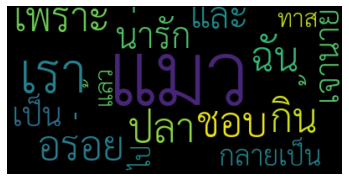

In [6]:
text = "แมวกินปลาอร่อยฉันชอบแมวเพราะแมวน่ารักและแมวเป็นเจ้านายเราเรากลายเป็นทาสแมวไปแล้วแมวแมวแมว"
wordcloud = WordCloud(font_path='THSarabun.ttf', # path ที่ตั้ง Font
                      stopwords = ' '.join(common.thai_stopwords()), # ลบคำที่ไม่ใช้ออก
                      regexp=r"[\u0E00-\u0E7Fa-zA-Z']+" # ป้องกัน bug วรรณยุกต์
                      ).generate(' '.join(word_tokenize(text)))
plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

### Cleaning Data

In [18]:
def process_text(text):
    text = text.lower().replace('\n', ' ').replace('\r', '').strip()
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)

    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]

    text = ' '.join(filtered_sentence)
    return text

In [19]:
data['Text_parsed'] = data['Text'].apply(process_text)

In [20]:
data.head()

,ArticleId,Text,Category,News_length,Text_parsed
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom exboss launches defence lawyers defen...
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses 168m payout eighteen former enron...


### Thai Cleaning Data Showcase

In [17]:
def process_thai_text(text):
    text = text.lower().replace('\n', ' ').replace('\r', '').strip()
    print(text)
    text = re.findall(r"[\u0E00-\u0E7Fa-zA-Z']+", text)
    print(text)
    text = ''.join(text)
    print(text)

    stop_words = common.thai_stopwords()
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]

    text = ' '.join(filtered_sentence)
    return text

In [20]:
print(process_thai_text("แมวกินปลาอร่อยฉันชอบแมวเพราะแมวน่ารักและแsdfมวเป็นเจ้านายเราเราw80$&*#(&*(2387348789กลายเป็นทาสแมวไปแล้วแมวแมวแมว"))

แมวกินปลาอร่อยฉันชอบแมวเพราะแมวน่ารักและแsdfมวเป็นเจ้านายเราเราw80$&*#(&*(2387348789กลายเป็นทาสแมวไปแล้วแมวแมวแมว
['แมวกินปลาอร่อยฉันชอบแมวเพราะแมวน่ารักและแsdfมวเป็นเจ้านายเราเราw', 'กลายเป็นทาสแมวไปแล้วแมวแมวแมว']
แมวกินปลาอร่อยฉันชอบแมวเพราะแมวน่ารักและแsdfมวเป็นเจ้านายเราเราwกลายเป็นทาสแมวไปแล้วแมวแมวแมว
แมว กิน ปลา อร่อย ชอบ แมว แมว น่ารัก แ sdf มว เจ้านาย w กลายเป็น ทาส แมว แมว แมว แมว


### Label Encoding

In [23]:
from sklearn import preprocessing

In [24]:
label_encoder = preprocessing.LabelEncoder()
data['Category_Target'] = label_encoder.fit_transform(data['Category'])

### Word2Vec

In [25]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [26]:
card_docs = [TaggedDocument(doc.split(' '), [i]) for i, doc in enumerate(data.Text_parsed)]


In [27]:
w2v_model = Doc2Vec(min_count=1, epochs=20)

In [28]:
w2v_model.build_vocab(card_docs)

w2v_model.train(card_docs, total_examples=w2v_model.corpus_count, epochs=w2v_model.epochs)

In [29]:
word2vec = [w2v_model.infer_vector((data['Text_parsed'][i].split(' '))) 
            for i in range(0,len(data['Text_parsed']))]

In [37]:
X = np.array(word2vec).tolist()

data['word2vec'] = X
data_reshape = np.reshape(X, (-1, 100))

In [38]:
data_reshape.shape

(1490, 100)

In [39]:
data.head()

,ArticleId,Text,Category,News_length,Text_parsed,Category_Target,word2vec
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom exboss launches defence lawyers defen...,0,"[-0.3981545567512512, 1.245684266090393, 1.365..."
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...,0,"[-1.3137707710266113, 0.6236714124679565, 0.41..."
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...,0,"[-1.8121365308761597, 0.7109492421150208, 0.13..."
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...,4,"[-0.2904607355594635, -0.26850295066833496, 0...."
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses 168m payout eighteen former enron...,0,"[-0.4325682818889618, 1.829339623451233, 1.056..."


In [40]:
data.to_csv('BBC_News_Preprocessed')

### Split the data in Training and Testing

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
data_temp = [ x for x in data['word2vec']]
data_reshape = np.reshape(data_temp, (-1, 100))
data_reshape.shape

(1490, 100)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(data_reshape,
                                                    data['Category_Target'],
                                                    test_size = 0.2,
                                                    random_state=8)

In [44]:
print(X_train.shape)
print(y_train.shape)

(1192, 100)
(1192,)


In [45]:
print(X_test.shape)
print(y_test.shape)

(298, 100)
(298,)


In [46]:
X_test[0]

array([-1.39282238,  0.086659  ,  0.36678505,  0.80104619, -1.94213688,
        0.25953794, -0.15178841,  1.71108127, -0.18439129,  1.25659692,
       -0.74352938, -0.63358957, -0.47145593, -0.05112668, -0.98633122,
       -0.39970428,  0.1400052 , -1.32956648,  0.2281252 , -1.10447252,
        0.4389849 ,  0.61726475,  1.00169861, -0.74718642,  1.77480602,
        0.8459878 , -1.61178362, -0.39568657, -1.40726864, -0.92292517,
        2.27976251,  0.36294892,  1.59854925,  0.36557171,  1.15223825,
        0.48549449, -0.38433161, -0.84008139,  0.3001658 , -0.94392395,
        1.2719481 ,  1.10319054, -0.98293257, -1.43205845,  0.45814791,
        1.31944597, -0.27344882,  0.15388238,  1.17580616, -1.22405791,
        1.12730944, -0.92517626, -0.13493308,  1.31445777, -0.91963017,
        0.83234668,  2.38814759, -0.88327813, -1.16562366, -0.70187777,
       -1.44010639,  0.17182888,  0.24616382,  0.7453897 ,  1.08697116,
        0.81742579, -0.14487296,  0.48326528,  0.60816669,  0.63

### Models Predictions

In [47]:
from sklearn.metrics import accuracy_score, classification_report

In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)
print('Accuracy', accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy 0.9664429530201343
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        76
           1       0.98      1.00      0.99        47
           2       0.98      0.95      0.96        55
           3       0.97      0.98      0.98        65
           4       0.95      0.96      0.95        55

    accuracy                           0.97       298
   macro avg       0.97      0.97      0.97       298
weighted avg       0.97      0.97      0.97       298



c:\Users\racha\dev\project_experiment\first_classification\exenv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)
print('Accuracy', accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy 0.9530201342281879
              precision    recall  f1-score   support

           0       0.95      0.92      0.93        76
           1       1.00      0.98      0.99        47
           2       0.96      0.89      0.92        55
           3       0.94      1.00      0.97        65
           4       0.93      0.98      0.96        55

    accuracy                           0.95       298
   macro avg       0.96      0.95      0.95       298
weighted avg       0.95      0.95      0.95       298



In [50]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)
print('Accuracy', accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy 0.9530201342281879
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        76
           1       1.00      0.94      0.97        47
           2       0.91      0.93      0.92        55
           3       0.98      0.98      0.98        65
           4       0.93      0.98      0.96        55

    accuracy                           0.95       298
   macro avg       0.95      0.95      0.95       298
weighted avg       0.95      0.95      0.95       298



In [51]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)
print('Accuracy', accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy 0.9228187919463087
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        76
           1       0.95      0.87      0.91        47
           2       0.91      0.91      0.91        55
           3       0.98      0.98      0.98        65
           4       0.85      0.93      0.89        55

    accuracy                           0.92       298
   macro avg       0.92      0.92      0.92       298
weighted avg       0.92      0.92      0.92       298



### Hyperparameter Tuning (KneighborsClassifier)

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 'p': [1,2,5]}
model = KNeighborsClassifier()
gridF = GridSearchCV(model, params_KNN, cv=3, verbose=1, n_jobs=-1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 21 candidates, totalling 63 fits


In [54]:
bestF.best_params_

{'n_neighbors': 3, 'p': 2}

### BayesSearch Hyperparameter Tunning

In [55]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer

model = KNeighborsClassifier()
opt = BayesSearchCV(
    model,
    {
        'n_neighbors': Integer(1, 10),
        'p': Integer(1, 10)
    }
    , cv=3, verbose=1, n_jobs=-1
)
opt.fit(X_train, y_train)
print(opt.best_score_)
print(opt.best_params_)



Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

c:\Users\racha\dev\project_experiment\first_classification\exenv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\Users\racha\dev\project_experiment\first_classification\exenv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\Users\racha\dev\project_experiment\first_classification\exenv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\Users\racha\dev\project_experiment\first_classification\exenv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\Users\racha\dev\project_experiment\first_classification\exenv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
0.9488162896767633
OrderedDict([('n_neighbors', 3), ('p', 2)])


In [56]:
model = KNeighborsClassifier(n_neighbors = 7, p = 5)
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)
print('Accuracy', accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy 0.9563758389261745
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        76
           1       1.00      1.00      1.00        47
           2       0.96      0.89      0.92        55
           3       0.93      1.00      0.96        65
           4       0.96      0.96      0.96        55

    accuracy                           0.96       298
   macro avg       0.96      0.96      0.96       298
weighted avg       0.96      0.96      0.96       298



In [57]:
from skopt.plots import plot_objective, plot_histogram

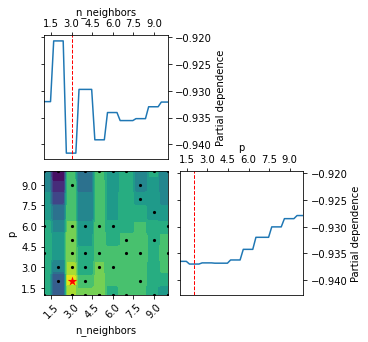

In [58]:
plot_objective(opt.optimizer_results_[0],
                   dimensions=['n_neighbors','p'],
                   n_minimum_search=int(1e8))
plt.show()

### Save Model

In [59]:
from joblib import dump, load

In [60]:
# dump(model, './models/model.joblib')
# dump(w2v_model, './models/w2v_model.joblib')


### Test Case

In [61]:
# load w2vector model and ai model
model = load('./models/model.joblib') 
w2v_model = load('./models/w2v_model.joblib')

In [62]:
test_text =''
with open('test_text.txt', 'r') as file:
    test_text = file.read().replace('\n', '')

In [63]:
def process_text(text):
    text = text.lower().replace('\n', ' ').replace('\r', '').strip()
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)

    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]

    text = ' '.join(filtered_sentence)
    return text

In [64]:
processed_text = process_text(test_text)

In [65]:
test_vec = w2v_model.infer_vector((processed_text.split(' ')))
test_vec.shape

(100,)

In [66]:
output = model.predict([test_vec])
output_classes = label_encoder.classes_
output_label = output_classes[output[0]]
output_label

'entertainment'